# K means clustering
## Mateusz Baran
### 155620

In [16]:
from sklearn.datasets import make_blobs
import pandas as pd

In [17]:
dataset, classes = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0)

df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df.head()

,var1,var2
0,2.204387,1.560857
1,-1.133740,2.684673
2,1.064983,4.102897
3,-2.376038,7.324207
4,1.682890,0.484444


In [18]:
from yellowbrick.cluster import KElbowVisualizer

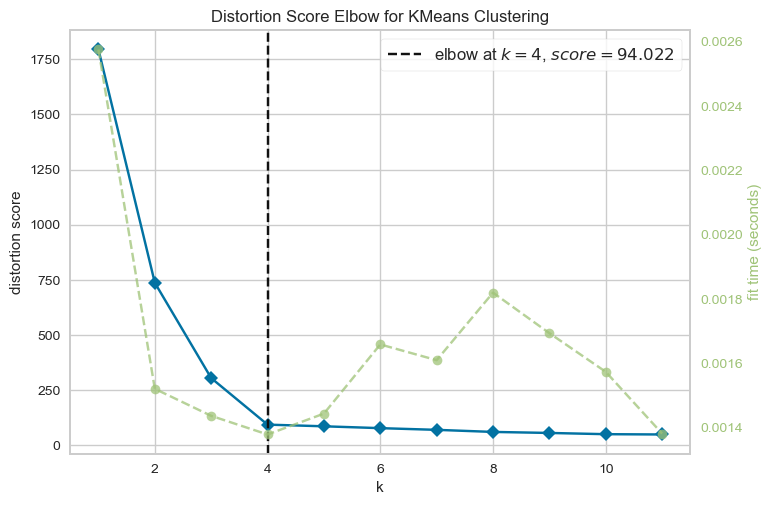

<Figure size 800x550 with 0 Axes>

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()
plt.savefig('elbow_plot.png')

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)

In [21]:
kmeans.labels_

array([1, 3, 0, 2, 1, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 2, 2, 2, 1, 2, 3,
       1, 3, 1, 1, 2, 1, 1, 0, 2, 0, 3, 1, 3, 0, 3, 0, 0, 2, 2, 2, 2, 0,
       1, 3, 0, 2, 2, 0, 2, 3, 3, 2, 0, 2, 3, 1, 0, 1, 2, 0, 1, 0, 2, 0,
       1, 2, 3, 3, 1, 1, 0, 0, 3, 2, 3, 3, 1, 1, 2, 0, 1, 3, 3, 0, 0, 1,
       3, 3, 2, 2, 2, 0, 0, 1, 3, 2, 0, 0, 2, 1, 1, 2, 2, 3, 0, 1, 1, 0,
       2, 3, 3, 1, 1, 0, 3, 3, 2, 0, 2, 3, 0, 1, 0, 3, 0, 3, 1, 0, 3, 1,
       3, 2, 2, 3, 2, 2, 1, 2, 1, 3, 1, 1, 3, 1, 0, 1, 3, 2, 2, 2, 0, 3,
       1, 0, 2, 3, 2, 1, 2, 1, 1, 3, 3, 2, 0, 1, 1, 3, 1, 0, 3, 2, 2, 2,
       0, 0, 3, 0, 3, 1, 0, 1, 0, 3, 3, 2, 0, 2, 1, 1, 0, 2, 3, 3, 3, 0,
       2, 1], dtype=int32)

In [22]:
kmeans.inertia_

94.02242630751755

In [23]:
kmeans.n_iter_

2

In [24]:
kmeans.cluster_centers_

array([[ 0.91932803,  4.34824615],
       [ 2.06911036,  0.96146833],
       [-1.33173192,  7.7400479 ],
       [-1.60782913,  2.9162828 ]])

In [25]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 50, 3: 50, 0: 50, 2: 50})

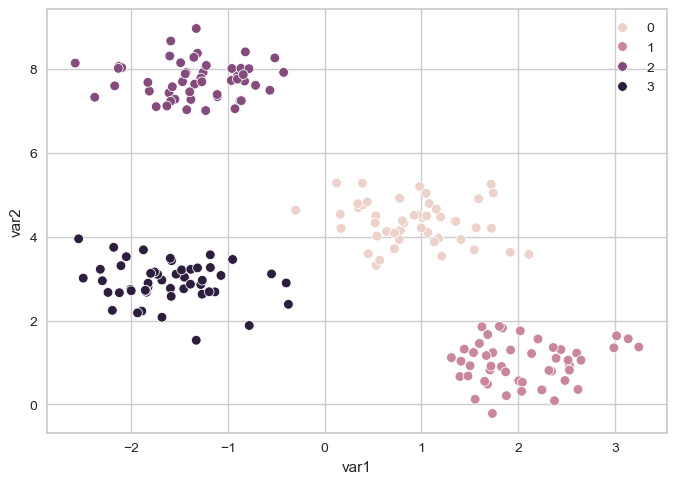

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='var1', y='var2', hue=kmeans.labels_)
plt.savefig('kmeans.png')
plt.show()

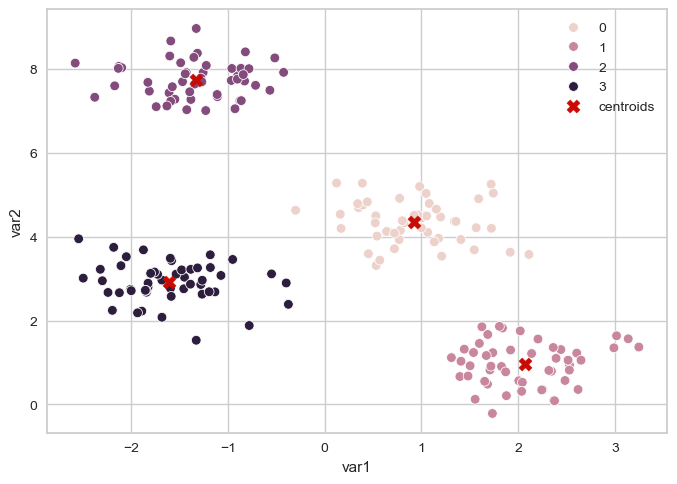

In [27]:
sns.scatterplot(data=df, x='var1', y='var2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', c='r', s=90, label='centroids')
plt.legend()
plt.savefig('kmeans_with_centroids.png')
plt.show()